<a href="https://colab.research.google.com/github/Divyanshiii-23/SURGE-2025/blob/main/AMR_RF_LR_SVM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


\nTraining Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        77
           1       0.92      0.86      0.89        85

    accuracy                           0.89       162
   macro avg       0.89      0.89      0.89       162
weighted avg       0.89      0.89      0.89       162

Confusion Matrix:
[[71  6]
 [12 73]]


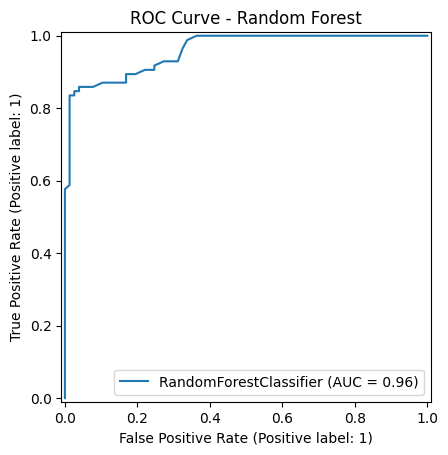

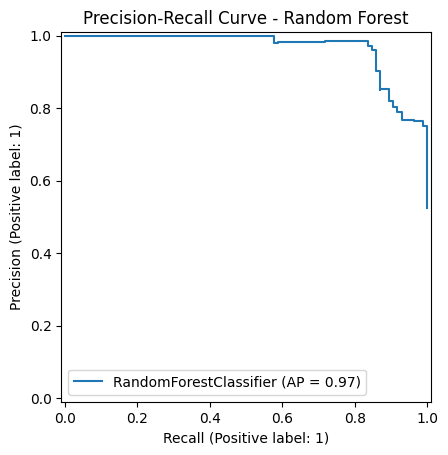

\nTraining Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        77
           1       0.85      0.87      0.86        85

    accuracy                           0.85       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.85      0.85      0.85       162

Confusion Matrix:
[[64 13]
 [11 74]]


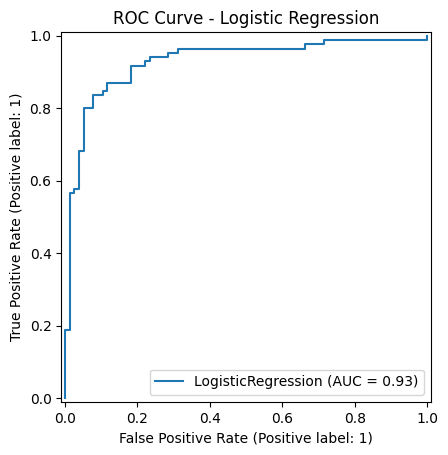

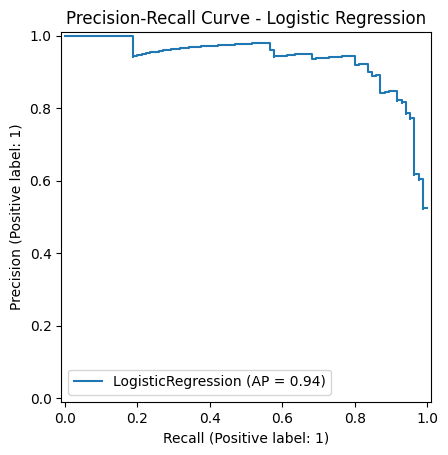

\nTraining SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        77
           1       0.91      0.81      0.86        85

    accuracy                           0.86       162
   macro avg       0.86      0.86      0.86       162
weighted avg       0.86      0.86      0.86       162

Confusion Matrix:
[[70  7]
 [16 69]]


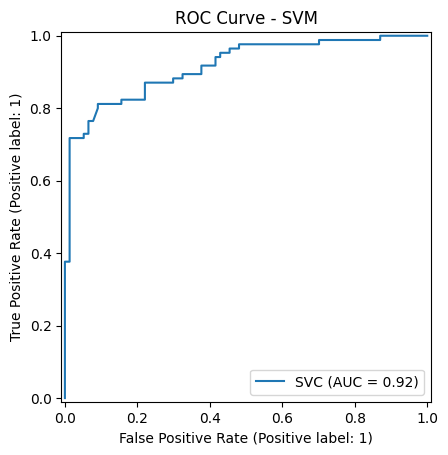

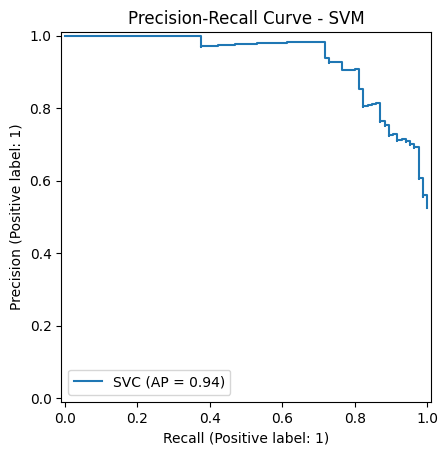

In [8]:
#fixed = """
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Load and prepare data
X_df = pd.read_csv("/content/cip_ctx_ctz_gen_multi_data.csv")
y_df = pd.read_csv("/content/cip_ctx_ctz_gen_pheno.csv")
merged = pd.merge(X_df, y_df[["prename", "CIP"]], on="prename")
merged = merged.rename(columns={"CIP": "label"})
X = merged.drop(["prename", "label"], axis=1)
y = merged["label"]
trained_feature_columns = X.columns.tolist()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    print(f"\\nTraining {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve - {name}")
    plt.show()

    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"Precision-Recall Curve - {name}")
    plt.show()
   # """

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
X_df = pd.read_csv("/content/cip_ctx_ctz_gen_multi_data.csv")
y_df = pd.read_csv("/content/cip_ctx_ctz_gen_pheno.csv")
merged = pd.merge(X_df, y_df[["prename", "CIP"]], on="prename")
merged = merged.rename(columns={"CIP": "label"})
X = merged.drop(["prename", "label"], axis=1)
y = merged["label"]

print(f"X shape: {X.shape}")
print(f"y distribution:\n{y.value_counts()}")


X shape: (809, 60936)
y distribution:
label
0    443
1    366
Name: count, dtype: int64


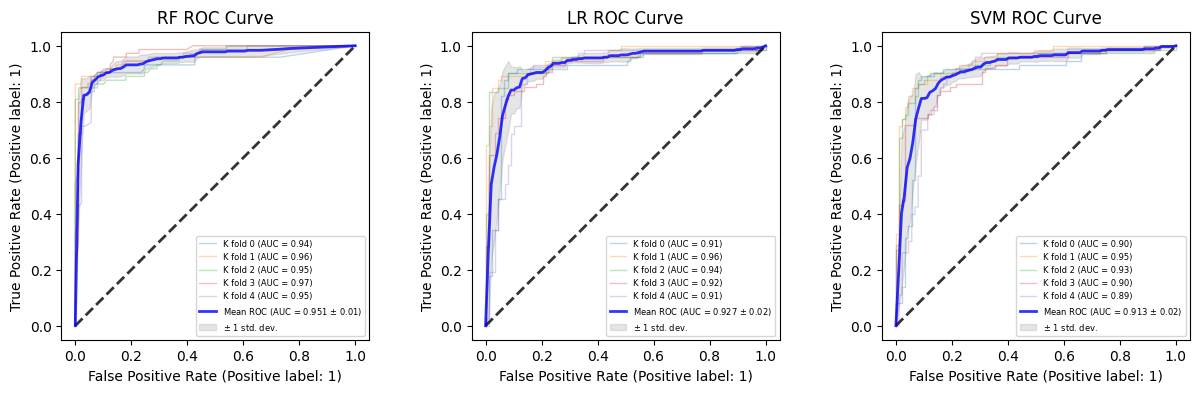

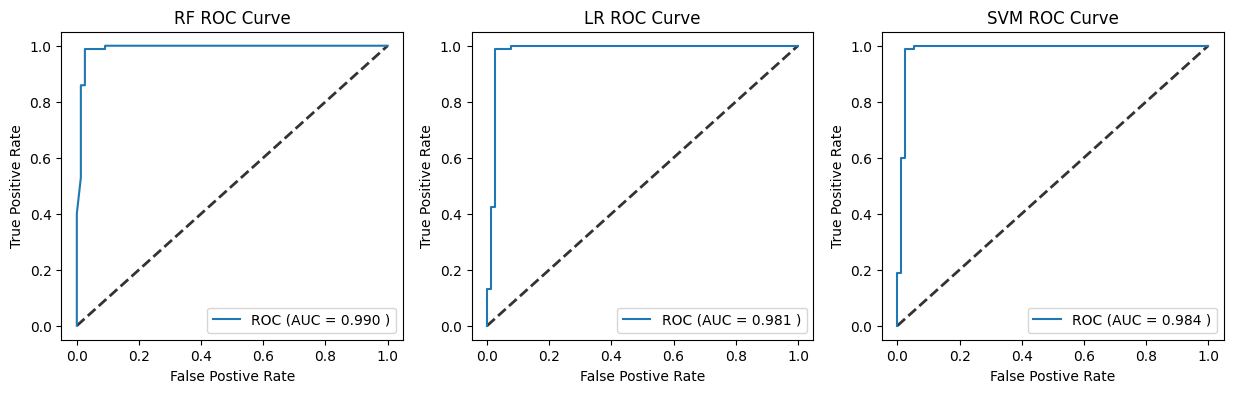

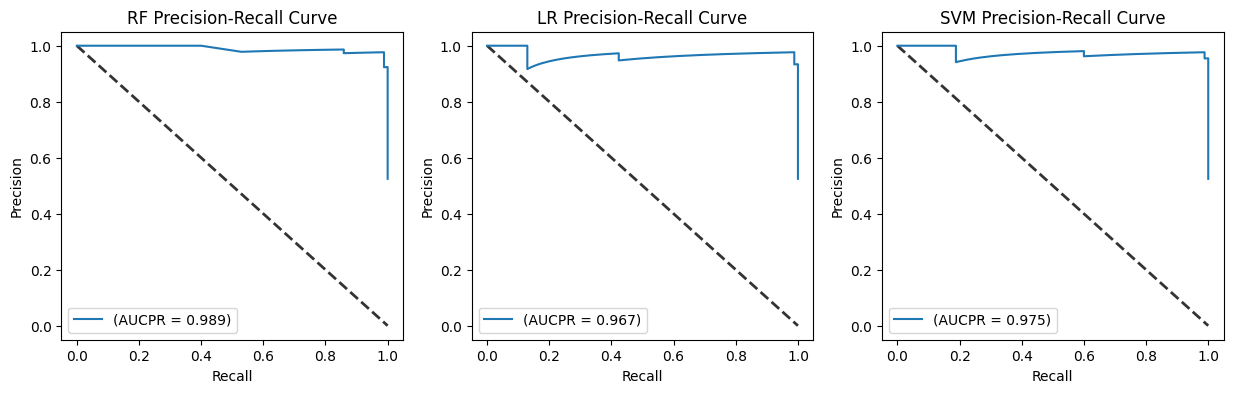

In [9]:
## Step1. Load Packages and Input Data ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,metrics
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold
from sklearn.metrics import matthews_corrcoef,auc, roc_curve,classification_report, confusion_matrix,average_precision_score, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
from pandas.core.frame import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter
##Step2. Training and evaluation of RF,LR, SVM ##
## cross validation
cv = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier(n_estimators=200, random_state=0)
lr = LogisticRegression(solver = 'lbfgs',max_iter=1000)
svm = SVC(kernel='linear', probability=True)
##*************** F1 + ROC curve
## RF
rf_tprs = []
rf_prs = []
rf_roc_aucs = []
rf_pr_aucs = []
rf_f1_matrix_out = []
rf_f1_report_out = []
rf_MCC_out = []
rf_pred_cls_out = []
rf_pred_prob_out = []
rf_y_test_out = []
rf_mean_fpr = np.linspace(0, 1, 100)
rf_mean_recall = np.linspace(0, 1, 100)
## LR
lr_tprs = []
lr_prs = []
lr_roc_aucs = []
lr_pr_aucs = []
lr_f1_matrix_out = []
lr_f1_report_out = []
lr_MCC_out = []
lr_pred_cls_out = []
lr_pred_prob_out = []
lr_y_test_out = []
lr_mean_fpr = np.linspace(0, 1, 100)
lr_mean_recall = np.linspace(0, 1, 100)
## SVM
svm_tprs = []
svm_prs = []
svm_roc_aucs = []
svm_pr_aucs = []
svm_f1_matrix_out = []
svm_f1_report_out = []
svm_MCC_out = []
svm_pred_cls_out = []
svm_pred_prob_out = []
svm_y_test_out = []
svm_mean_fpr = np.linspace(0, 1, 100)
svm_mean_recall = np.linspace(0, 1, 100)
fig,[ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15, 4))
for i, (train, test) in enumerate(cv.split(X, y)):
    ## train the new model
    rf.fit(X.iloc[train], y.iloc[train])
    ## roc curve
    rf_viz = RocCurveDisplay.from_estimator(rf, X.iloc[test], y.iloc[test],name='K fold {}'.format(i),alpha=0.3, lw=1,ax=ax1)
    rf_interp_tpr = np.interp(rf_mean_fpr, rf_viz.fpr, rf_viz.tpr)
    rf_interp_tpr[0] = 0.0
    rf_tprs.append(rf_interp_tpr)
    rf_roc_aucs.append(rf_viz.roc_auc)
    ## evaluation metrics
    rf_pred_cls = rf.predict(X.iloc[test])
    rf_pred_prob = rf.predict_proba(X.iloc[test])[:,1]
    rf_f1_matrix = confusion_matrix(y.iloc[test],rf_pred_cls)
    rf_f1_report = classification_report(y.iloc[test],rf_pred_cls)
    rf_MCC = matthews_corrcoef(y.iloc[test],rf_pred_cls)
    ### save evalu_metrics out
    rf_pred_cls_out.append(rf_pred_cls)
    rf_pred_prob_out.append(rf_pred_prob)
    rf_f1_matrix_out.append(rf_f1_matrix)
    rf_f1_report_out.append(rf_f1_report)
    rf_MCC_out.append(rf_MCC)
    rf_y_test_out.append(y.iloc[test])
    ## LR
    lr.fit(X.iloc[train], y.iloc[train])
    ## roc curve
    lr_viz = RocCurveDisplay.from_estimator(lr, X.iloc[test], y.iloc[test],name='K fold {}'.format(i),alpha=0.3, lw=1,ax=ax2)
    lr_interp_tpr = np.interp(lr_mean_fpr, lr_viz.fpr, lr_viz.tpr)
    lr_interp_tpr[0] = 0.0
    lr_tprs.append(lr_interp_tpr)
    lr_roc_aucs.append(lr_viz.roc_auc)
    ## evaluation metrics
    lr_pred_cls = lr.predict(X.iloc[test])
    lr_pred_prob = lr.predict_proba(X.iloc[test])[:,1]
    lr_f1_matrix = confusion_matrix(y.iloc[test],lr_pred_cls)
    lr_f1_report = classification_report(y.iloc[test],lr_pred_cls)
    lr_MCC = matthews_corrcoef(y.iloc[test],lr_pred_cls)
    ### save evalu_metrics out
    lr_pred_cls_out.append(lr_pred_cls)
    lr_pred_prob_out.append(lr_pred_prob)
    lr_f1_matrix_out.append(lr_f1_matrix)
    lr_f1_report_out.append(lr_f1_report)
    lr_MCC_out.append(lr_MCC)
    lr_y_test_out.append(y.iloc[test])
    ## SVM
    svm.fit(X.iloc[train], y.iloc[train])
    ## roc curve
    svm_viz = RocCurveDisplay.from_estimator(svm, X.iloc[test], y.iloc[test],name='K fold {}'.format(i),alpha=0.3, lw=1,ax=ax3)
    svm_interp_tpr = np.interp(svm_mean_fpr, svm_viz.fpr, svm_viz.tpr)
    svm_interp_tpr[0] = 0.0
    svm_tprs.append(svm_interp_tpr)
    svm_roc_aucs.append(svm_viz.roc_auc)
    ## evaluation metrics
    svm_pred_cls = svm.predict(X.iloc[test])
    svm_pred_prob = svm.predict_proba(X.iloc[test])[:,1]
    svm_f1_matrix = confusion_matrix(y.iloc[test],svm_pred_cls)
    svm_f1_report = classification_report(y.iloc[test],svm_pred_cls)
    svm_MCC = matthews_corrcoef(y.iloc[test],svm_pred_cls)
    ### save evalu_metrics out
    svm_pred_cls_out.append(svm_pred_cls)
    svm_pred_prob_out.append(svm_pred_prob)
    svm_f1_matrix_out.append(svm_f1_matrix)
    svm_f1_report_out.append(svm_f1_report)
    svm_MCC_out.append(svm_MCC)
    svm_y_test_out.append(y.iloc[test])
    ### save mcc and f1-report
rf_mcc = pd.DataFrame(rf_MCC_out)
lr_mcc = pd.DataFrame(lr_MCC_out)
svm_mcc = pd.DataFrame(svm_MCC_out)
all_mcc = pd.concat([rf_mcc,lr_mcc,svm_mcc],axis=1)
all_mcc.columns = ['RF_MCC','LR_MCC','SVM_MCC']
all_mcc.to_csv("Train_MCC.csv",index=False)

rf_f1_report = pd.DataFrame(rf_f1_report_out)
rf_f1_report.columns=['RF']
lr_f1_report = pd.DataFrame(lr_f1_report_out)
lr_f1_report.columns=['LR']
svm_f1_report = pd.DataFrame(svm_f1_report_out)
svm_f1_report.columns=['SVM']
all_f1_report = pd.concat([rf_f1_report,lr_f1_report,svm_f1_report],axis=0)
all_f1_report.to_csv("Train_F1_report.csv",index=False)
###plot training results and save mean tpr and fpr###
######### RF
ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
rf_mean_tpr = np.mean(rf_tprs, axis=0)
rf_mean_tpr[-1] = 1.0
rf_mean_auc = auc(rf_mean_fpr, rf_mean_tpr)
rf_std_auc = np.std(rf_roc_aucs)
ax1.plot(rf_mean_fpr, rf_mean_tpr, color='b',label=r'Mean ROC (AUC = %0.3f $\pm$ %0.2f)' % (rf_mean_auc, rf_std_auc),lw=2, alpha=.8)
rf_std_tpr = np.std(rf_tprs, axis=0)
rf_tprs_upper = np.minimum(rf_mean_tpr + rf_std_tpr, 1)
rf_tprs_lower = np.maximum(rf_mean_tpr - rf_std_tpr, 0)
ax1.fill_between(rf_mean_fpr, rf_tprs_lower, rf_tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
ax1.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="RF ROC Curve")
ax1.legend(loc="lower right",prop = {'size':6})

#plt.savefig("Train_RF_ROC.pdf")
### save mean FPR and TPR
#np.savetxt("Train_RF_mean_fpr.csv",rf_mean_fpr,delimiter=",")
#np.savetxt("Train_RF_mean_tpr.csv",rf_mean_tpr,delimiter=",")
######### LR
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
lr_mean_tpr = np.mean(lr_tprs, axis=0)
lr_mean_tpr[-1] = 1.0
lr_mean_auc = auc(lr_mean_fpr, lr_mean_tpr)
lr_std_auc = np.std(lr_roc_aucs)
ax2.plot(lr_mean_fpr, lr_mean_tpr, color='b',label=r'Mean ROC (AUC = %0.3f $\pm$ %0.2f)' % (lr_mean_auc, lr_std_auc),lw=2, alpha=.8)
lr_std_tpr = np.std(lr_tprs, axis=0)
lr_tprs_upper = np.minimum(lr_mean_tpr + lr_std_tpr, 1)
lr_tprs_lower = np.maximum(lr_mean_tpr - lr_std_tpr, 0)
ax2.fill_between(lr_mean_fpr, lr_tprs_lower, lr_tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
ax2.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="LR ROC Curve")
ax2.legend(loc="lower right",prop = {'size':6})
#plt.savefig("Train_LR_ROC.pdf")
### save mean FPR and TPR
#np.savetxt("Train_LR_mean_fpr.csv",lr_mean_fpr,delimiter=",")
#np.savetxt("Train_LR_mean_tpr.csv",lr_mean_tpr,delimiter=",")

######### SVM
ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
svm_mean_tpr = np.mean(svm_tprs, axis=0)
svm_mean_tpr[-1] = 1.0
svm_mean_auc = auc(svm_mean_fpr, svm_mean_tpr)
svm_std_auc = np.std(svm_roc_aucs)
ax3.plot(svm_mean_fpr, svm_mean_tpr, color='b',label=r'Mean ROC (AUC = %0.3f $\pm$ %0.2f)' % (svm_mean_auc, svm_std_auc),lw=2, alpha=.8)
svm_std_tpr = np.std(svm_tprs, axis=0)
svm_tprs_upper = np.minimum(svm_mean_tpr + svm_std_tpr, 1)
svm_tprs_lower = np.maximum(svm_mean_tpr - svm_std_tpr, 0)
ax3.fill_between(svm_mean_fpr, svm_tprs_lower, svm_tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
ax3.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="SVM ROC Curve")
ax3.legend(loc="lower right",prop = {'size':6})
plt.savefig("Train_RF_LR_SVM_ROC.pdf")
### save mean FPR and TPR
#np.savetxt("Train_SVM_mean_fpr.csv",svm_mean_fpr,delimiter=",")
#np.savetxt("Train_SVM_mean_tpr.csv",svm_mean_tpr,delimiter=",")

####******************** Evaluation on test data ************************************************
# pre_class
rf_eva_pred = rf.predict(X_test)
lr_eva_pred = lr.predict(X_test)
svm_eva_pred = svm.predict(X_test)
# pre_prob
rf_eva_pred_prob = rf.predict_proba(X_test)[:,1]
lr_eva_pred_prob = lr.predict_proba(X_test)[:,1]
svm_eva_pred_prob = svm.predict_proba(X_test)[:,1]


## save f1 report,confusion_matrix, MCC
f=open("Test_RF_LR_SVM_eva_metrics.csv","w")
# f1 report
print(classification_report(y_test,rf_eva_pred),file=f)
print(classification_report(y_test,lr_eva_pred),file=f)
print(classification_report(y_test,svm_eva_pred),file=f)
# confusion_matrix
print(confusion_matrix(y_test,rf_eva_pred),file=f)
print(confusion_matrix(y_test,lr_eva_pred),file=f)
print(confusion_matrix(y_test,svm_eva_pred),file=f)
# MCC
print(matthews_corrcoef(y_test,rf_eva_pred),file=f)
print(matthews_corrcoef(y_test,lr_eva_pred),file=f)
print(matthews_corrcoef(y_test,svm_eva_pred),file=f)
f.close()

## Plot ROC curve and PR curve
## ROC
fig,[ax4,ax5,ax6] = plt.subplots(nrows=1,ncols=3,figsize=(15, 4))
ax4.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
rf_fpr, rf_tpr,thresholds = roc_curve(y_test,rf_eva_pred_prob)
rf_roc_auc = metrics.auc(rf_fpr,rf_tpr)
ax4.plot(rf_fpr,rf_tpr,label= 'ROC (AUC = {:.3f} )'.format(rf_roc_auc))
ax4.set(xlabel='False Postive Rate',ylabel='True Positive Rate',title="RF ROC Curve")
ax4.legend(loc='lower right')

ax5.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
lr_fpr, lr_tpr,thresholds = roc_curve(y_test,lr_eva_pred_prob)
lr_roc_auc = metrics.auc(lr_fpr,lr_tpr)
ax5.plot(lr_fpr,lr_tpr,label= 'ROC (AUC = {:.3f} )'.format(lr_roc_auc))
ax5.set(xlabel='False Postive Rate',ylabel='True Positive Rate',title="LR ROC Curve")
ax5.legend(loc='lower right')

ax6.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
svm_fpr, svm_tpr,thresholds = roc_curve(y_test,svm_eva_pred_prob)
svm_roc_auc = metrics.auc(svm_fpr,svm_tpr)
ax6.plot(svm_fpr,svm_tpr,label= 'ROC (AUC = {:.3f} )'.format(svm_roc_auc))
ax6.set(xlabel='False Postive Rate',ylabel='True Positive Rate',title="SVM ROC Curve")
ax6.legend(loc='lower right')
plt.savefig("Test_RF_LR_SVM_ROC_curve.pdf",bbox_inches='tight')

###### PR curve
fig,[ax7,ax8,ax9] = plt.subplots(nrows=1,ncols=3,figsize=(15, 4))
rf_precision,rf_recall,thresholds = precision_recall_curve(y_test,rf_eva_pred_prob)
rf_pr_auc = metrics.auc(rf_recall,rf_precision)
ax7.plot([0,1],[1,0],linestyle="--",lw=2,color='k',alpha=.8)
ax7.plot(rf_recall,rf_precision,label= '(AUCPR = {:.3f})'.format(rf_pr_auc))
ax7.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],xlabel='Recall',ylabel='Precision',title="RF Precision-Recall Curve")
ax7.legend(loc='lower left')

lr_precision,lr_recall,thresholds = precision_recall_curve(y_test,lr_eva_pred_prob)
lr_pr_auc = metrics.auc(lr_recall,lr_precision)
ax8.plot([0,1],[1,0],linestyle="--",lw=2,color='k',alpha=.8)
ax8.plot(lr_recall,lr_precision,label= '(AUCPR = {:.3f})'.format(lr_pr_auc))
ax8.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],xlabel='Recall',ylabel='Precision',title="LR Precision-Recall Curve")
ax8.legend(loc='lower left')

svm_precision,svm_recall,thresholds = precision_recall_curve(y_test,svm_eva_pred_prob)
svm_pr_auc = metrics.auc(svm_recall,svm_precision)
ax9.plot([0,1],[1,0],linestyle="--",lw=2,color='k',alpha=.8)
ax9.plot(svm_recall,svm_precision,label= '(AUCPR = {:.3f})'.format(svm_pr_auc))
ax9.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],xlabel='Recall',ylabel='Precision',title="SVM Precision-Recall Curve")
ax9.legend(loc='lower left')
plt.savefig("Test_RF_LR_SVM_PR_curve.pdf",bbox_inches='tight')

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# Giessen
giessen_data = pd.read_csv('/content/cip_ctx_ctz_gen_multi_data.csv', index_col=0)
giessen_pheno = pd.read_csv('/content/cip_ctx_ctz_gen_pheno.csv', index_col=0)

# Example
example_data = pd.read_csv('/content/example_data.csv')
example_pheno = pd.read_csv('/content/example_pheno.csv')

# --- Step 2: Align by Common Features ---
# Remove "X" prefix in Giessen
giessen_data.columns = giessen_data.columns.str.replace('^X', '', regex=True)

# Get common features
common_features = giessen_data.columns.intersection(example_data.columns)


# Intersect on column names
common_features = giessen_data.columns.intersection(example_data.columns)

# Reduce to common features only
X_train = giessen_data[common_features]
X_test = example_data[common_features]

# Get corresponding phenotype labels
# Assuming phenotype files have same index and a single column with resistance labels
y_train = giessen_pheno.loc[X_train.index, 'CIP']
y_test = example_pheno.loc[X_test.index, 'CIP']

# --- Step 3: Preprocess

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: Train Model ---

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# --- Step 5: Evaluate on Example Dataset ---

y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       482
           1       1.00      0.99      0.99       418

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



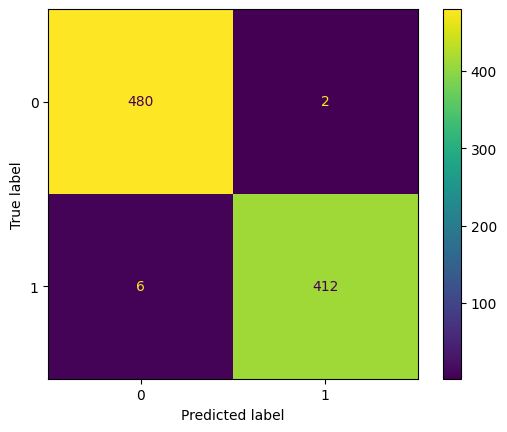

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [13]:
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Support Vector Machine (with probability=True to enable predict_proba)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

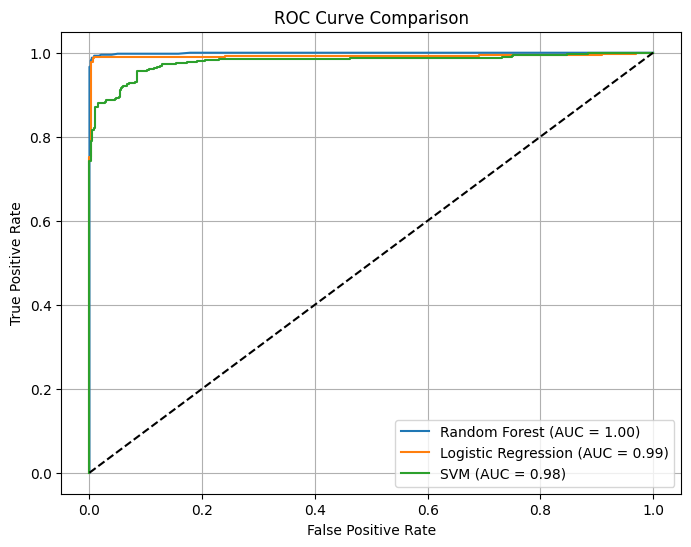

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for name, model in {
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "SVM": svm_model
}.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

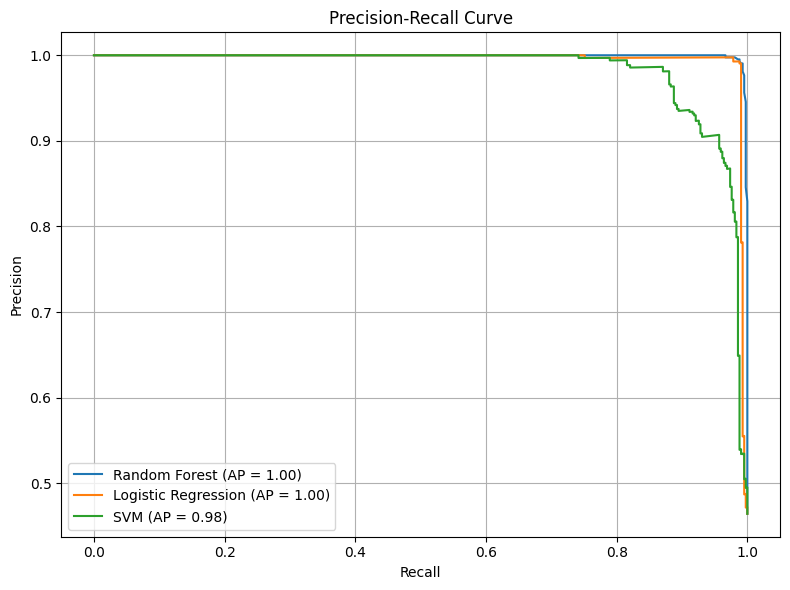

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Store models in a dictionary
models = {
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "SVM": svm_model
}

# Plot precision-recall curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Get probability scores (needed for PR curve)
    y_scores = model.predict_proba(X_test_scaled)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_precision = average_precision_score(y_test, y_scores)

    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()